# Sales Prediction Using Python

### Task Completed by - Arijit Goswami
### Task 5
### Batch - August
### Domain Name- Data Science

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:/Users/hp/Desktop/Advertising.csv", header=0)

Target: Predicting how much of a product people will buy based on the amount spent for Advertising on TV, Radio and Newspaper.

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Here we can see 'Unnamed: 0' column is unnecessary, so we are going to delete that.

In [5]:
del df['Unnamed: 0']

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### We need to keep all the null values out of our dataset, if there is any

In [7]:
data = df.where((pd.notnull(df)),'')

## Visualization of Dataset

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Primary Observation-
    
   - Average money Spent on TV is highest and on Radio is lowest.
   - max Sale = 27
   - min sale = 1.6

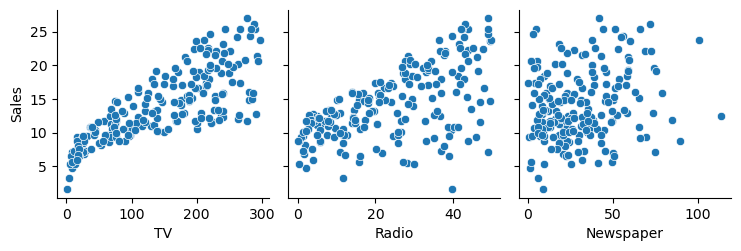

In [9]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars="Sales", kind="scatter")
plt.show()

## Pair Plot Observation-
    
   - We can see that Newspaper has no relation with Sales.
   - We can't find that only TV has linear relation with Sales (Simple Linear Regression) or, both TV and Radio have the relationship with Sales (Multiple Linear Regression)

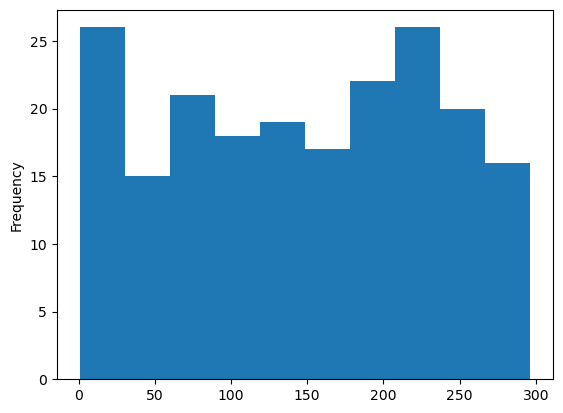

In [10]:
data['TV'].plot.hist(bins=10)
plt.show()

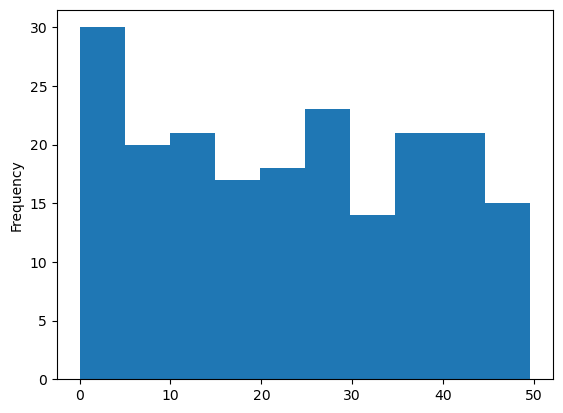

In [11]:
data['Radio'].plot.hist(bins=10)
plt.show()

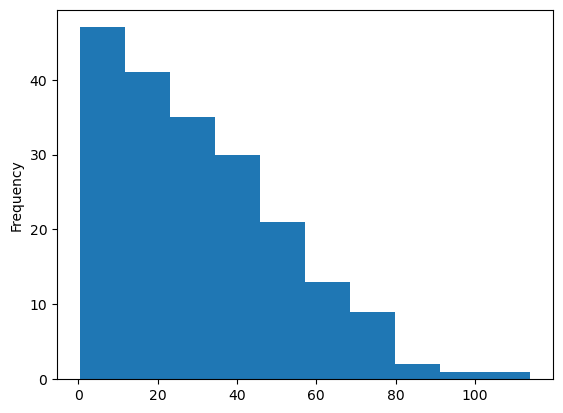

In [12]:
data['Newspaper'].plot.hist(bins=10)
plt.show()

## Histogram Observation-

   - The majority Sales is the result of low advertising cost in Newspaper.

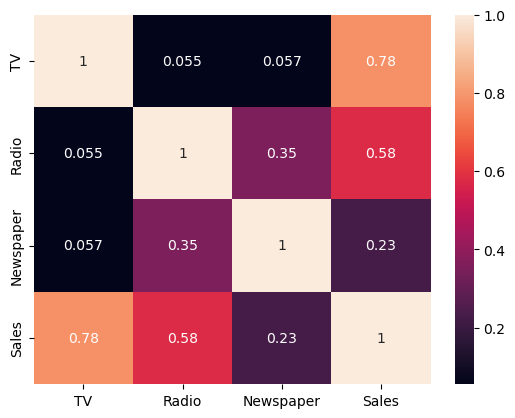

In [13]:
sns.heatmap(data.corr(), annot= True)
plt.show()

## Heatmap Observation-

   - Here we can see that correlation between TV and Sales is 0.78 and correlation between Radio and Sales is 0.58.
    
   - We can say that TV is highly correlated with Sales but still We can't conclude whether we should Radio as an input feature or not.

## We will use both the cases-

   - where X = data[['TV', 'Radio']] and
          X_single = data['TV']
          
   - output y = data['Sales'] is same in both cases.

### Separating Input and Output Features-

In [14]:
input_features = ['TV', 'Radio']
X = data[input_features]
X_single = data['TV']
y = data['Sales']

## Splitting Data into Train and test set

In [15]:
from sklearn.model_selection import train_test_split

# Case-1 [Both 'TV' and 'Radio' are used as input features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [17]:
print('intercept: c = ', model_1.intercept_)
print('slope: m1 and m2 = ', model_1.coef_)

intercept: c =  2.9514407608079747
slope: m1 and m2 =  [0.04451639 0.19520741]


In [18]:
y_test_a = model_1.predict(X_test)

### We need to evaluate The performance of the models

In [19]:
r2_score(y_test, y_test_a)

0.8604541663186569

In [20]:
# Case-2 [Only 'TV' is used as input feature]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df[['TV']], df[['Sales']], test_size=0.2, random_state = 0)

In [21]:
model_2 = LinearRegression()
model_2.fit(X_train_new, y_train_new)

LinearRegression()

In [22]:
print('intercept: c = ', model_2.intercept_)
print('slope: m1 = ', model_2.coef_)

intercept: c =  [7.29249377]
slope: m1 =  [[0.04600779]]


In [23]:
y_test_new_a = model_2.predict(X_test_new)

In [24]:
r2_score(y_test_new, y_test_new_a)

0.6763151577939721

## We can see that the r-square value of model_1 (0.86045) is much greater than that of model_2 (0.67631).

## So, we can conclude that model_1 is better than model_2

### Example-

In [25]:
new_x = [[221,49]]
print(model_1.predict(new_x))

[22.35472662]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### We can get the output 22.3547 which means if we invest 221 units on TV and 49 units on Radio advertisement, we can expect to sell 22.3547 units approximately.